-3.000 |   74.66667
-2.429 |   54.85714
-1.857 |   38.09524
-1.286 |   24.38095
-0.714 |   13.71429
-0.143 |    6.09524
 0.429 |    1.52381
 1.000 |    0.00000
 1.571 |    1.52381
 2.143 |    6.09524
 2.714 |   13.71429
 3.286 |   24.38095
 3.857 |   38.09524
 4.429 |   54.85714
 5.000 |   74.66667


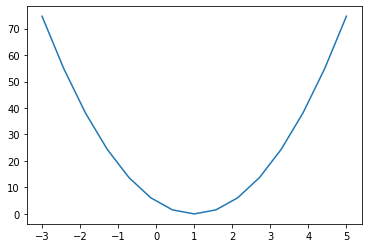

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# cost cal
x = np.array([1, 2, 3])
y = np.array([1, 2, 3])

def cost_func(w, x, y):
    c = 0
    for i in range(len(x)):
        c += (w * x[i] -y[i]) ** 2
    return c / len(x)

w_val = []
cost_val = []

# -3에서 5까지 15개로 쪼개 w값에 따라 cost계산
for feed_w in np.linspace(-3, 5, num = 15):
    curr_cost = cost_func(feed_w, x, y)
    print("{:6.3f} | {:10.5f}".format(feed_w, curr_cost))
    w_val.append(feed_w)
    cost_val.append(curr_cost)
    
plt.plot(w_val, cost_val)
plt.show()

-3.000 |   74.66667
-2.429 |   54.85714
-1.857 |   38.09524
-1.286 |   24.38095
-0.714 |   13.71429
-0.143 |    6.09524
 0.429 |    1.52381
 1.000 |    0.00000
 1.571 |    1.52381
 2.143 |    6.09524
 2.714 |   13.71429
 3.286 |   24.38095
 3.857 |   38.09524
 4.429 |   54.85714
 5.000 |   74.66667


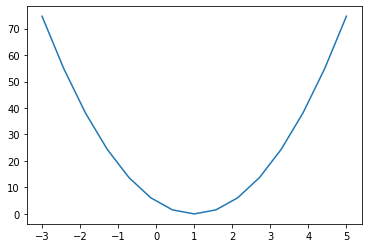

In [4]:
# cost cal tensor
def cost_func(w, x, y):
    hypothesis = x * w
    # reduce_mean - 평균, square - 제곱
    return tf.reduce_mean(tf.square(hypothesis - y))
    
w_values = np.linspace(-3, 5, num = 15)
cost_values = []

w_val = []
cost_val = []

for feed_w in w_values:
    curr_cost = cost_func(feed_w, x,y)
    cost_values.append(curr_cost)
    print("{:6.3f} | {:10.5f}".format(feed_w, curr_cost))
    w_val.append(feed_w)
    cost_val.append(curr_cost)
    
plt.plot(w_val, cost_val)
plt.show()

In [6]:
# gradient descent
alpha = 0.01
gradient = tf.reduce_mean(tf.multiply(tf.multiply(w, x) - y, x))
descent = w - tf.multiply(alpha, gradient)
w.assign(descent)

NameError: name 'w' is not defined

    0 |    74.6667 |   4.813334
   10 |    28.7093 |   3.364572
   20 |    11.0387 |   2.466224
   30 |     4.2444 |   1.909177
   40 |     1.6320 |   1.563762
   50 |     0.6275 |   1.349578
   60 |     0.2413 |   1.216766
   70 |     0.0928 |   1.134412
   80 |     0.0357 |   1.083346
   90 |     0.0137 |   1.051681
  100 |     0.0053 |   1.032047
  110 |     0.0020 |   1.019871
  120 |     0.0008 |   1.012322
  130 |     0.0003 |   1.007641
  140 |     0.0001 |   1.004738
  150 |     0.0000 |   1.002938
  160 |     0.0000 |   1.001822
  170 |     0.0000 |   1.001130
  180 |     0.0000 |   1.000700
  190 |     0.0000 |   1.000434
  200 |     0.0000 |   1.000269
  210 |     0.0000 |   1.000167
  220 |     0.0000 |   1.000103
  230 |     0.0000 |   1.000064
  240 |     0.0000 |   1.000040
  250 |     0.0000 |   1.000025
  260 |     0.0000 |   1.000015
  270 |     0.0000 |   1.000009
  280 |     0.0000 |   1.000006
  290 |     0.0000 |   1.000004


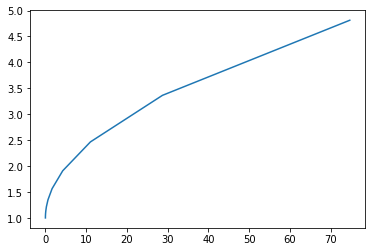

In [6]:
# tf.set_random_seed(0)
import tensorflow as tf
tf.random.set_seed(0)

x_data = [1., 2., 3., 4.]
y_data = [1., 3., 5., 7.]

# w = tf.Variable(tf.random.normal([1], -100., 100.))

w = tf.Variable([5.0])

w_val = []
cost_val = []
step_val = []

for step in range(300):
    hypothesis = w * x
    cost = tf.reduce_mean(tf.square(hypothesis - y))
    
    alpha = 0.01
    gradient = tf.reduce_mean(tf.multiply(tf.multiply(w, x) - y, x))
    descent = w - tf.multiply(alpha, gradient)
    w.assign(descent)
    
    if (step % 10 == 0):
        print('{:5} | {:10.4f} | {:10.6f}'.format(step, cost.numpy(), w.numpy()[0]))
        
        step_val.append(step)
        w_val.append(w.numpy()[0])
        cost_val.append(cost.numpy())

plt.plot(cost_val, w_val)
plt.show()

